# Image analysis using Singular Value Decomposition

In this notebook we explore using image compression and reconstruction using singular value decomposition. An image is imported and converted to a matrix whose values correspond to the intensity of black shading at each pixel. For example, if values range between 0 and 255, 125 is gray, 0 white, and so on. 


We can take this matrix, B, and factorize it into three matrices, $$ B = [ U , S , V^{T} ] $$

Where U and V are orthonormal matrices containing the eigenvectors of A, and S a diagonal matrix containing the 'singular values', or square root of eigenvalues associated with the corresponding columns of U and Rows of V. 

The main diagonal of S contains values which are decreasing in magnitude, and the relative magnitude corresponds roughly to how much of the matrix is explained by the corresponding eigenvectors of U and V. In the context of image analysis, we can take a relatively small number of singular values and reconstruct almost the entire image using significantly less data than the original image contained. 

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time

from urllib.request import urlretrieve as get
from PIL import Image




In [16]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

Here we will pull an image from the internet showing the 'Golden Age of Workplace Accidents' to demonstrate image SVD

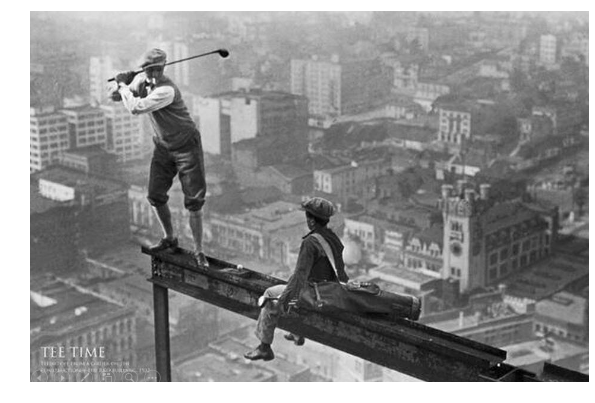

In [15]:
# create a file-like object from the url
data = get("http://i.imgur.com/yjrvBxb.png","golf-practice.png")

# read the image file in a numpy array
golf_practice = Image.open(data[0])

fig = plt.figure()
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(golf_practice)

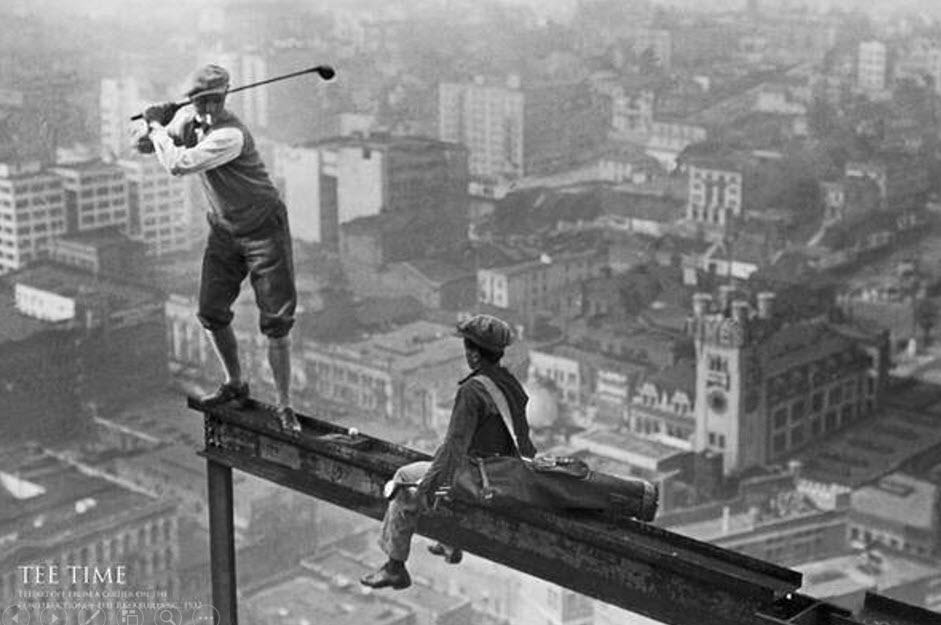

In [8]:
golf_practice

Next we can make a function that takes as arguments the image file and a number of single values to keep in the reconstruction of the image. It is interesting to note how few singular values are needed before the image reforms to reasonable levels of detail. 

In [43]:
#this function converts to grayscale and takes the SVD

def SVD_Image_Grayscale(image, n):
    
    grayscale = image.convert('LA')

    # convert the image into an array
    image_mat = np.array(list(grayscale.getdata(band=0)), float)
    image_mat.shape = (grayscale.size[1], grayscale.size[0])
    image_mat = np.matrix(image_mat)
    
    # perform SVD on the array
    
    U, sigma, V = np.linalg.svd(image_mat)
    
    reconst_img = np.matrix(U[:, :n]) * np.diag(sigma[:n]) * np.matrix(V[:n, :])
    
    fig = plt.figure()
    plt.figure(figsize=(10,10))
    fig.suptitle('Singular Value Reconstruction of image using ' +  str(n) + ' out of ' + str(len(image_mat)) + ' singular values')
    plt.imshow(reconst_img, cmap='gray')



(625,)

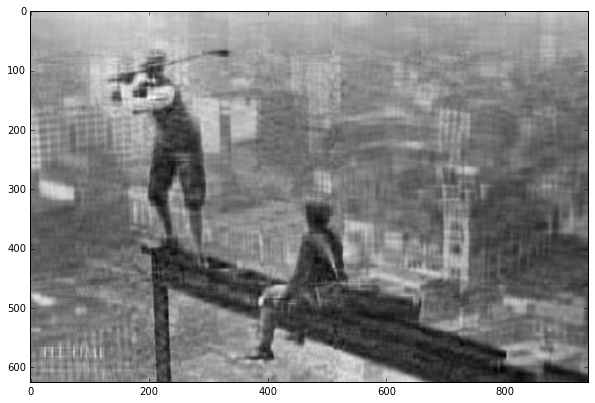

In [40]:
SVD_Image_Grayscale(golf_practice,30)

<b> Interactive Demonstration of SVD </b>

Try experimenting with different values of n, for example, 1, 10, 20, 100, 200. Some things to think about while you play with different numbers:
1. At what point does the image stop changing significantly?
2. What does this tell us about the associated singular values?
3. What might this tell us about the underlying numerical matrix?

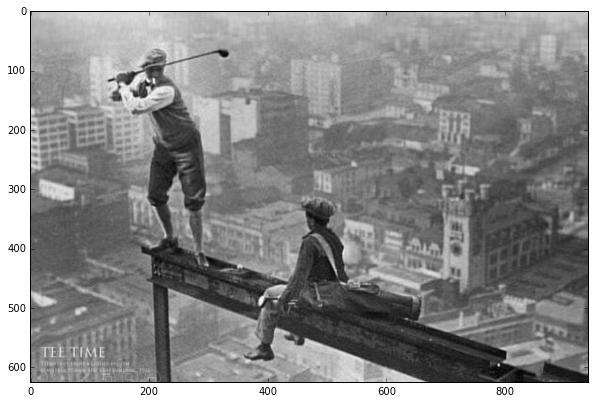

In [70]:
from ipywidgets import widgets, interact, fixed, IntSlider

def f(x):
    print(x)
    
interact(SVD_Image_Grayscale,
         image = fixed(golf_practice),
         n = IntSlider(min=0,max=400,step=2,value=1),
        __manual=True)




<b> Interactive Demonstration Followup </b>

Although its very subjective, the image stops changing significantly around the 100 mark. Take a look below this text to see a function that plots the logarithm of magnitude of each Singular Value of the matrix. It's clear that a bit less than 100 Singular Values captures all the SV's with magnitudes bigger than 1000. Recalling that the matrix was formed by multiplying $ B = [ U , S , V^{T} ] $, this means that some vectors in $ U \text{ and } V^{T} $ have significantly higher weighting than others. 

This means the underlying numerical matrix is almost fully described by a relatively small number of Singular Values, and their associated vectors in $ U \text{ and } V^{T} $. Another way of saying this is that the original matrix has very low rank <a href = "https://en.wikipedia.org/wiki/Rank_(linear_algebra)"> rank </a>, an interesting problem explored further in the <a href = "https://en.wikipedia.org/wiki/Netflix_Prize"> Netflix Prize </a>.

In [68]:
def Image_SingularValues(image):
    
    grayscale = image.convert('LA')

    # convert the image into an array
    image_mat = np.array(list(grayscale.getdata(band=0)), float)
    image_mat.shape = (grayscale.size[1], grayscale.size[0])
    image_mat = np.matrix(image_mat)
    
    # perform SVD on the array
    
    U, sigma, V = np.linalg.svd(image_mat)
    
    # just keep the SV's along the main diagonal of sigma
    
    sv =  np.diag(sigma)
    
    fig = plt.figure(figsize=(8,10))
    plt.plot(sv, 'ro')
    plt.yscale('log')
    plt.title('Semilog plot of Singular Value magnitude')
    plt.ylabel('Log of Singular Value magnitude')
    plt.xlabel('Column number of the Singular Value in the numerical matrix')
    plt.show()

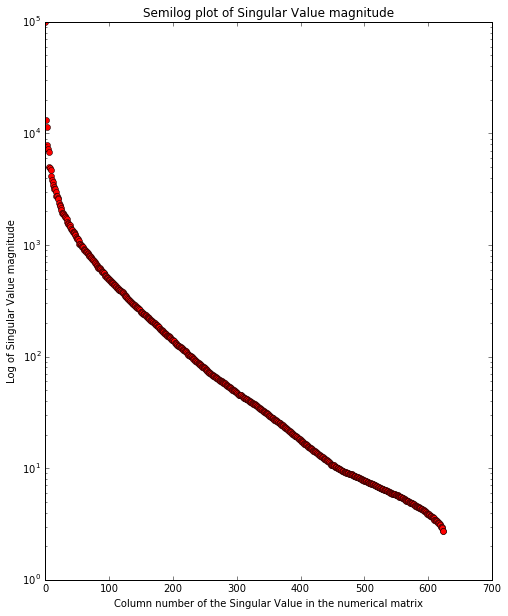

In [69]:
Image_SingularValues(golf_practice)
